In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset

df=pd.read_csv('flighprice.csv')

In [3]:
df.head()

,Unnamed: 0,Airline,Day,Date,Departure,Arrival,Duration,Source,Destination,Stops,Fare
0,0,Air Asia,Mon,1 Nov,21:25,06:45,9h 20m,New Delhi,Mumbai,1,5953
1,1,Air Asia,Mon,1 Nov,21:25,07:15,9h 50m,New Delhi,Mumbai,1,5953
2,2,Air Asia,Mon,1 Nov,20:45,06:45,10h 00m,New Delhi,Mumbai,1,5953
3,3,Air Asia,Mon,1 Nov,20:45,07:15,10h 30m,New Delhi,Mumbai,1,5953
4,4,Air Asia,Mon,1 Nov,18:35,06:45,12h 10m,New Delhi,Mumbai,1,5953


In [4]:
#droping the unnamed column

df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
#checking head
df.head()

,Airline,Day,Date,Departure,Arrival,Duration,Source,Destination,Stops,Fare
0,Air Asia,Mon,1 Nov,21:25,06:45,9h 20m,New Delhi,Mumbai,1,5953
1,Air Asia,Mon,1 Nov,21:25,07:15,9h 50m,New Delhi,Mumbai,1,5953
2,Air Asia,Mon,1 Nov,20:45,06:45,10h 00m,New Delhi,Mumbai,1,5953
3,Air Asia,Mon,1 Nov,20:45,07:15,10h 30m,New Delhi,Mumbai,1,5953
4,Air Asia,Mon,1 Nov,18:35,06:45,12h 10m,New Delhi,Mumbai,1,5953


In [6]:
#checking shape

df.shape

(1600, 10)

1600 rows and 10 columns

In [7]:
#checking the unique elments

for i in df.columns:
    print(f'----- {i} -------')
    print(df[i].value_counts())

----- Airline -------
Vistara      460
IndiGo       453
Air India    306
Go First     204
Air Asia     110
SpiceJet      67
Name: Airline, dtype: int64
----- Day -------
Mon    302
Sat    297
Tue    294
Fri    236
Wed    204
Thu    138
Sun    129
Name: Day, dtype: int64
----- Date -------
 1 Nov    302
 6 Nov    297
 2 Nov    294
 5 Nov    236
 3 Nov    204
 4 Nov    138
 7 Nov    129
Name: Date, dtype: int64
----- Departure -------
07:00    38
18:50    30
06:15    30
08:00    29
09:45    29
         ..
23:10     1
18:20     1
14:40     1
09:50     1
13:55     1
Name: Departure, Length: 169, dtype: int64
----- Arrival -------
23:25    43
09:55    31
12:50    31
08:15    30
18:15    28
         ..
01:10     1
21:10     1
22:20     1
07:00     1
21:30     1
Name: Arrival, Length: 160, dtype: int64
----- Duration -------
2h 10m     118
2h 15m      98
2h 20m      54
1h 50m      30
1h 55m      27
          ... 
17h 55m      1
9h 25m       1
18h 50m      1
17h 20m      1
27h 10m      1
Name:

All columns seems to be in order without much junk values

In [8]:
#checking the null values

df.isnull().sum()

Airline        0
Day            0
Date           0
Departure      0
Arrival        0
Duration       0
Source         0
Destination    0
Stops          0
Fare           0
dtype: int64

The the dataset is void of null values

In [9]:
df.head()

,Airline,Day,Date,Departure,Arrival,Duration,Source,Destination,Stops,Fare
0,Air Asia,Mon,1 Nov,21:25,06:45,9h 20m,New Delhi,Mumbai,1,5953
1,Air Asia,Mon,1 Nov,21:25,07:15,9h 50m,New Delhi,Mumbai,1,5953
2,Air Asia,Mon,1 Nov,20:45,06:45,10h 00m,New Delhi,Mumbai,1,5953
3,Air Asia,Mon,1 Nov,20:45,07:15,10h 30m,New Delhi,Mumbai,1,5953
4,Air Asia,Mon,1 Nov,18:35,06:45,12h 10m,New Delhi,Mumbai,1,5953


In [10]:
#checking the datatype of columns

df.dtypes

Airline        object
Day            object
Date           object
Departure      object
Arrival        object
Duration       object
Source         object
Destination    object
Stops          object
Fare            int64
dtype: object

All the columns are categorical except fare


-----Airline----


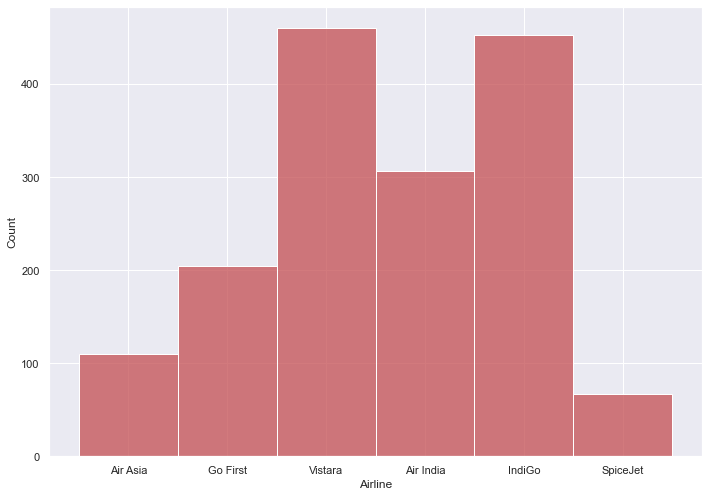


-----Day----


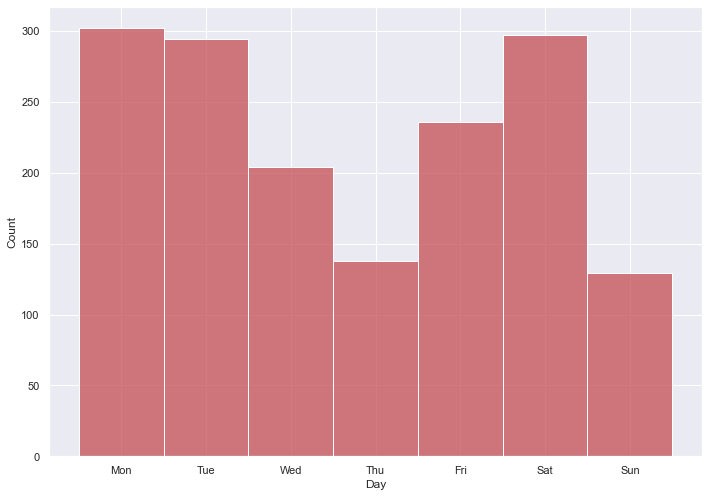


-----Date----


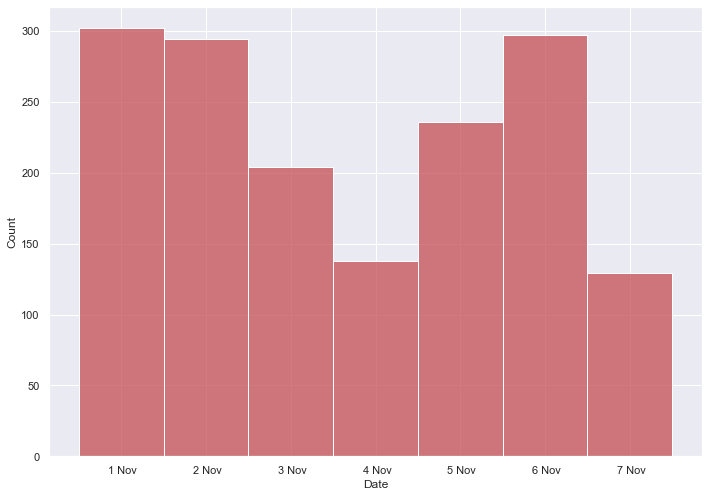


-----Source----


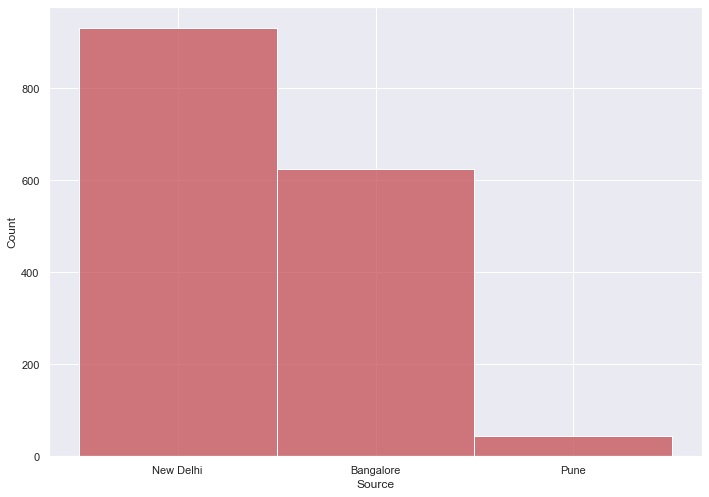


-----Destination----


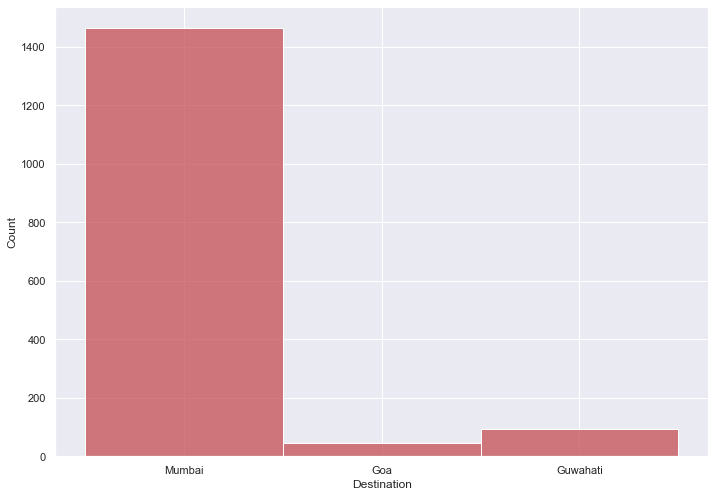


-----Stops----


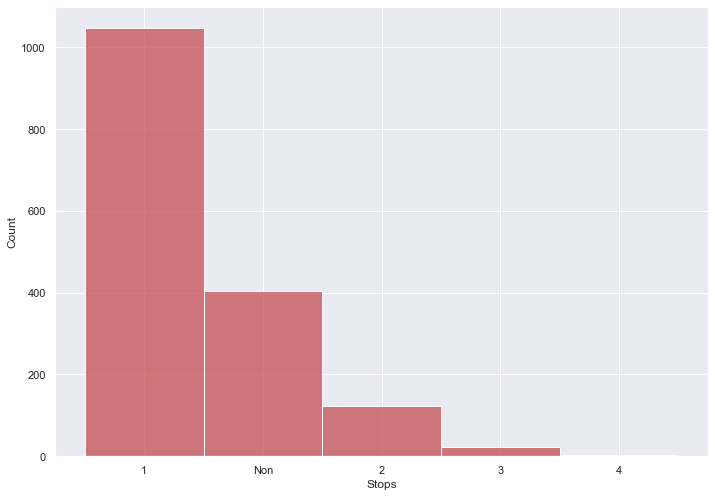

In [11]:
for i in df.columns:
    if i=='Fare' or i=='Departure' or i=='Arrival' or i=='Duration':
        pass
    else:
        sns.set_theme(style="darkgrid")
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        print(f'\n-----{i}----')
        sns.histplot(df[i],color='r')
        plt.show()

Vistara nad indigo are the most common airline companies in the dataset.
The the data is fetched mainly from th first week of november
the major cities in the the souce are new delhi, bangalore and pune

mumbai, goa an guwahati are the major destination cities in dataset

single flights are the moct common, followed by non stop stop flights

### Bi-variate analysi

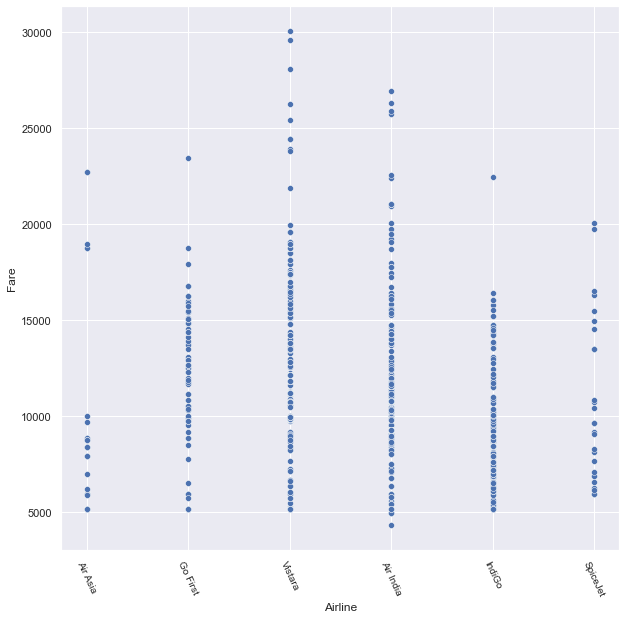

In [12]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Airline', y ='Fare', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Vistara and Air india provides flights at almost all ranges of price

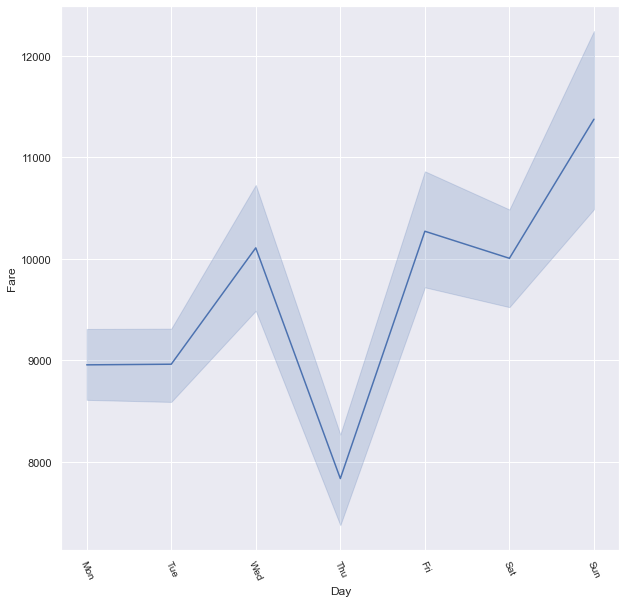

In [13]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Day', y ='Fare', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Higher prices in in some week days and constant higher prices on weekends

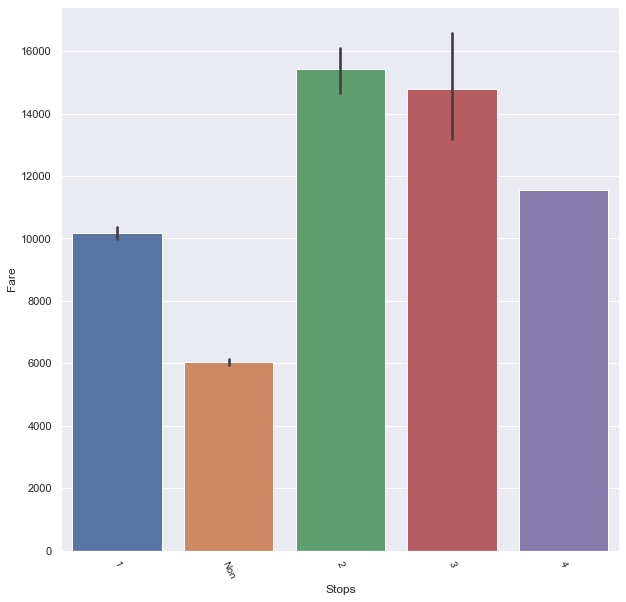

In [14]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'Stops', y ='Fare', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

some fligts wih 2,3 stops have higher price

In [15]:
#conviring the duration to minuts

df['Duration']=df['Duration'].str.replace('h','')
df['Duration']=df['Duration'].str.replace('m','')
df['Duration'].str.split(' ').apply(lambda x: int(x[0]) * 60 + int(x[1]))

0        560
1        590
2        600
3        630
4        730
        ... 
1595    1425
1596     385
1597     660
1598     650
1599     320
Name: Duration, Length: 1600, dtype: int64

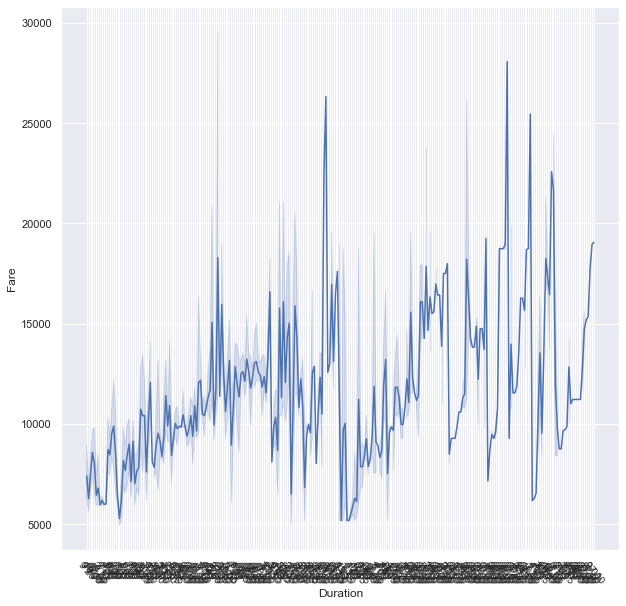

In [23]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Duration', y ='Fare', data = df)
plt.xticks(rotation = -50, fontsize = 10)
plt.show()

Linear increase in the fare values as the duration of the flight increases


-----Stops----


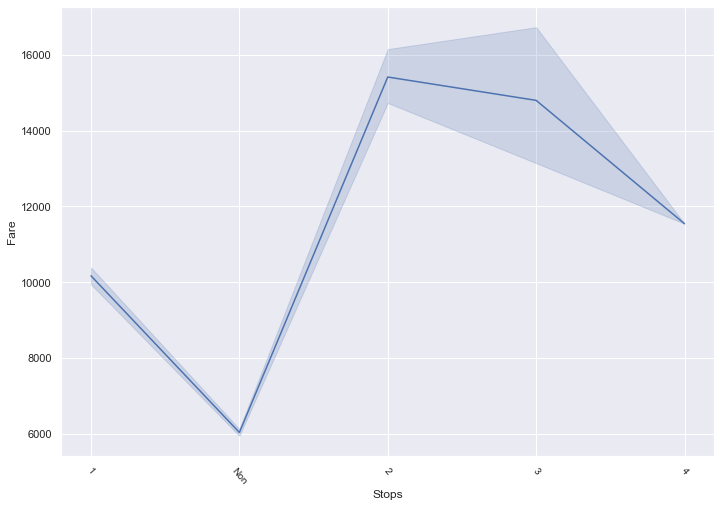

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
print(f'\n-----Stops----')
sns.lineplot(x = 'Stops', y ='Fare', data = df)
plt.xticks(rotation = -50, fontsize = 10)
plt.show()

The flights with 2 or more stops in journey has significant impact in the increase in flight price

In [25]:
df.columns

Index(['Airline', 'Day', 'Date', 'Departure', 'Arrival', 'Duration', 'Source',
       'Destination', 'Stops', 'Fare'],
      dtype='object')

<AxesSubplot:xlabel='Airline', ylabel='count'>

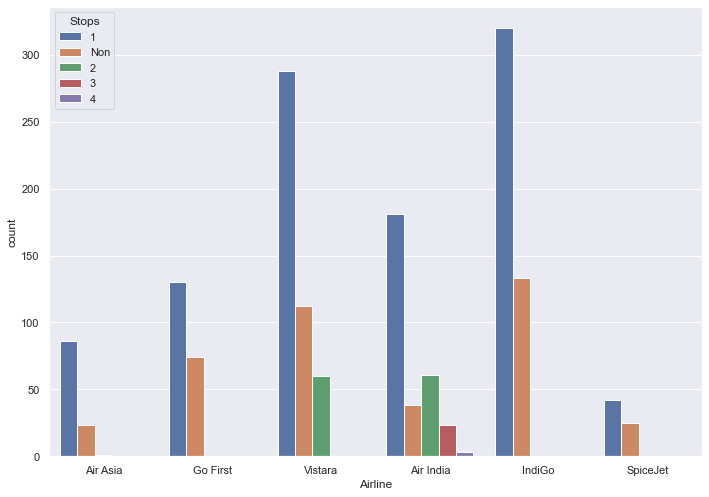

In [40]:
sns.countplot(df['Airline'],hue=df['Stops'])

Air india seems to be hving most flights with multiple stops

<AxesSubplot:xlabel='Airline', ylabel='Fare'>

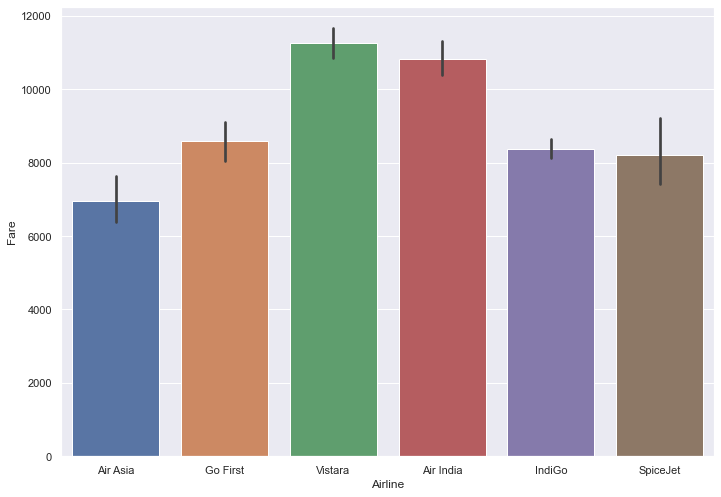

In [41]:
sns.barplot(x=df['Airline'],y=df['Fare'])

Vistara and Air India has most pricy flights in the dataset

<AxesSubplot:xlabel='Day', ylabel='Fare'>

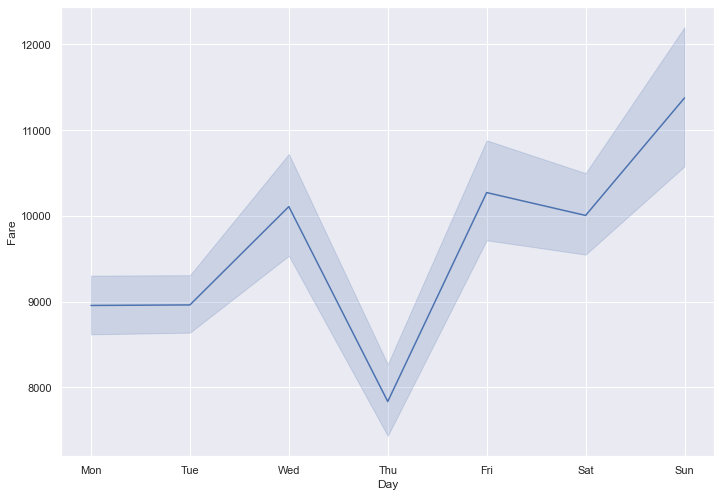

In [53]:
sns.lineplot(df['Day'],y=df['Fare'])

Prices are higher towardss the weekends

In [54]:
df.columns

Index(['Airline', 'Day', 'Date', 'Departure', 'Arrival', 'Duration', 'Source',
       'Destination', 'Stops', 'Fare'],
      dtype='object')

In [57]:
#remving the date column

df.drop(['Date'],inplace=True,axis=1)

In [59]:
df.columns

Index(['Airline', 'Day', 'Departure', 'Arrival', 'Duration', 'Source',
       'Destination', 'Stops', 'Fare'],
      dtype='object')

In [60]:
cols=['Airline', 'Day', 'Departure', 'Arrival', 'Duration', 'Source',
       'Destination', 'Stops']
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols:
    df[i] = le.fit_transform(df[i])

<AxesSubplot:>

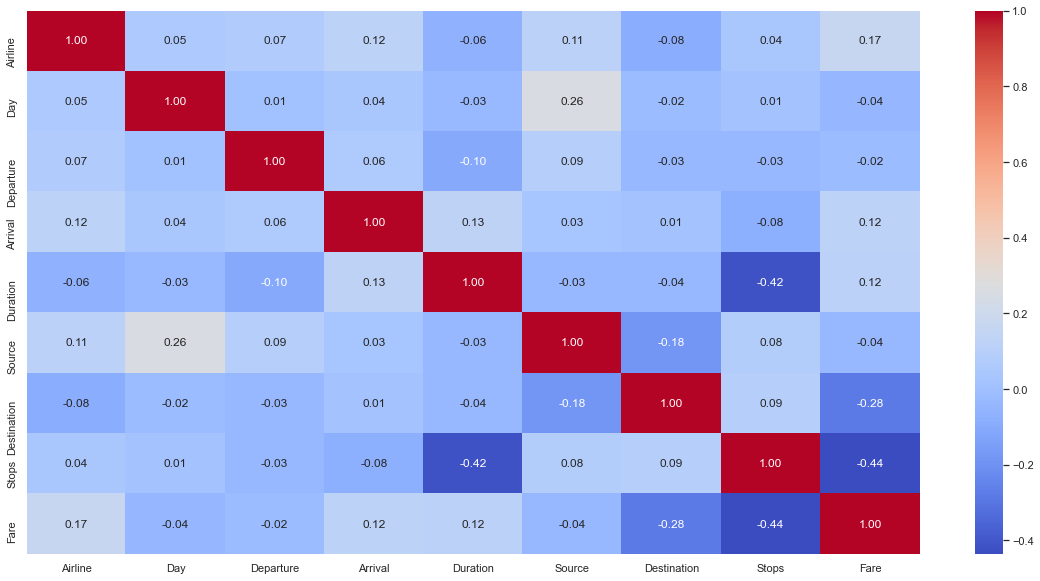

In [61]:
#plotting the correlation

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f',cmap="coolwarm")

The kind of airline, the arrival time, the duration of the flight has higher correlation with the target variable

In [63]:
dfcor=df.corr()
#cheking correlation to target
dfcor['Fare'].sort_values(ascending=False)

Fare           1.000000
Airline        0.167057
Arrival        0.120161
Duration       0.117742
Departure     -0.016003
Source        -0.036648
Day           -0.039302
Destination   -0.284633
Stops         -0.436570
Name: Fare, dtype: float64

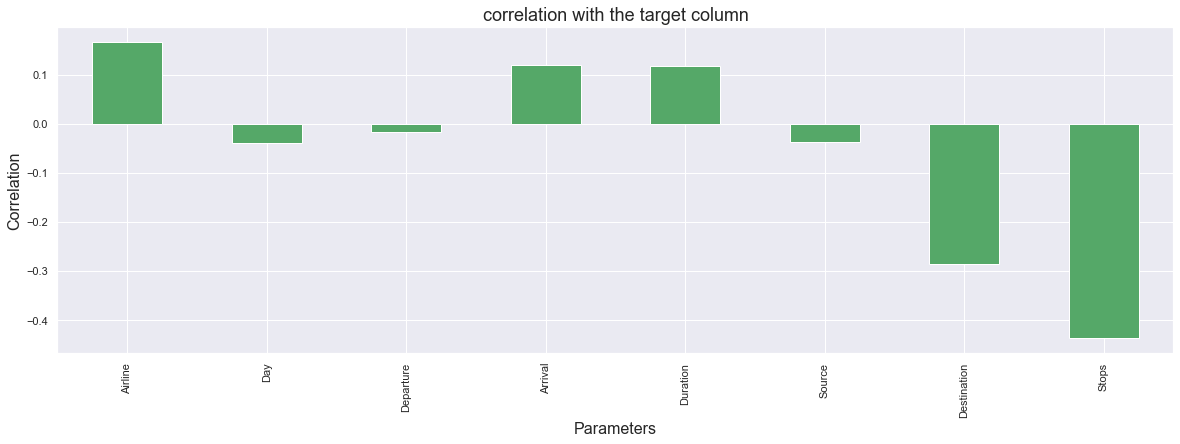

In [67]:
#plotting the higher correlation columns with the target

#plotting correlation to target
plt.figure(figsize = (20,6))
dfcor['Fare'].drop(['Fare']).plot(kind = 'bar', color = 'g')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

The places betwwen the flights, the number of stops has a negative correlation to the target

In [68]:
#splitting the data
x = df.drop('Fare', axis = 1)
y = df['Fare']

### Model Building

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [71]:
#checking the best random state

lr=LinearRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best r2 score',maxacc,'on random state',maxrs)

best r2 score 0.3552787628764992 on random state 177


In [72]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 17)

In [73]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_test,y_test)
    ##print(mod.coef_)
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('Root Mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    scores = cross_val_score(mod, x_train, y_train, scoring='r2',cv=5)
    print('mean_cross_validation:',scores.mean())
    print('\n\n')

In [74]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()

In [75]:
alg=[lr, knr, dtr, svr, rfr, ls, rd]
for i in alg:
    print(model(i))

Model: LinearRegression()
r2score: 0.31402453569119904
Mean squared error 10630957.01683217
Root Mean squared error 3260.5148392289475
mean absolute error: 2268.8242152239204
mean_cross_validation: 0.2707723495059011



None
Model: KNeighborsRegressor()
r2score: 0.5843972306629742
Mean squared error 6440835.579083335
Root Mean squared error 2537.880134892768
mean absolute error: 1653.8229166666667
mean_cross_validation: 0.37047251528569447



None
Model: DecisionTreeRegressor()
r2score: 1.0
Mean squared error 0.0
Root Mean squared error 0.0
mean absolute error: 0.0
mean_cross_validation: 0.39419002854852225



None
Model: SVR()
r2score: -0.012976653799902982
Mean squared error 15698682.862443428
Root Mean squared error 3962.1563399799647
mean absolute error: 3033.024106467133
mean_cross_validation: -0.023745886021508934



None
Model: RandomForestRegressor()
r2score: 0.9383659640165035
Mean squared error 955178.1680335416
Root Mean squared error 977.3321687295173
mean absolute error: 5

RandomForestRegressor gives the best prediction score based on the cross validation score

### Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf' : [5,10,15,20],
              'n_estimators' : [5,10,15,20,50,100],
              'max_depth':[5,10,15,20,50,100],
              'min_samples_split':[2,4,6,8,10]}

In [77]:
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters,verbose=1)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'max_depth': 100, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}


In [78]:
rfr=RandomForestRegressor(max_depth=100, min_samples_leaf=5,min_samples_split=8,n_estimators=100)
rfr.fit(x_train,y_train)
rfr.score(x_train, y_train)
pred_kn = rfr.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_kn))
print('Mean squared error: ', mean_squared_error(y_test,pred_kn))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_kn)))
print('R2 Score: ', r2_score(y_test,pred_kn))

Mean absolute error:  1371.8130354703756
Mean squared error:  5262006.134098109
Root mean squared error:  2293.9063045595626
R2 Score:  0.6604626379997061


### We are getting an R2 score of R2 Score:  0.6604626379997061

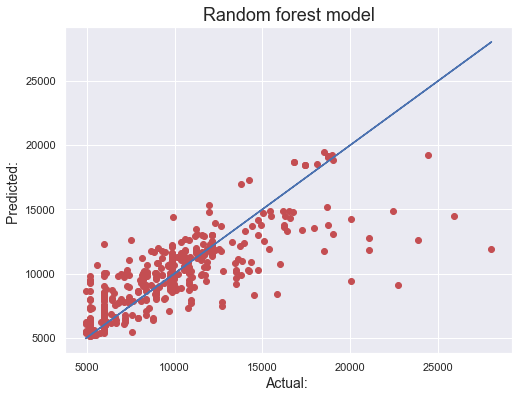

In [80]:
#plotting the model
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_kn, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Random forest model', fontsize = 18)
plt.show()

In [81]:
#saving the obj

import joblib
joblib.dump(rfr, 'flight_price.obj')

['flight_price.obj']